## Random Forest

In [2]:
import pandas as pd
import sqlite3
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPRegressor
from matplotlib import pyplot as plt

In [3]:
# Connect to database
conn = sqlite3.connect('cleaned_customer_support.db')
data = pd.read_sql_query("SELECT * FROM cleaned_customer_support", conn)
y = data['CSAT_Score']

In [4]:
# Function to plot results
def plot(r2, rmse, y_pred):
    print(f'RMSE: {rmse:.4f},R2 Score: {r2}')
    
    # Plot actual vs predicted CSAT scores
    plt.scatter(data['CSAT_Score'], y_pred, alpha=1)
    plt.xlabel('Actual CSAT Scores')
    plt.ylabel('Predicted CSAT Scores')
    plt.title(f'Actual vs Predicted CSAT Scores - RMSE: {rmse:.4f}')
    plt.show()
    return rmse

Random Forest Model using multiple features:
RMSE: 1.2553
MAE: 0.8567
R-squared: 0.3336

Top 5 Important Features for the Model:
sentiment_score: 0.3438
response_time_minutes: 0.1280
issue_reported_hour_of_day: 0.0778
issue_reported_day_of_week: 0.0519
Sub-category_Return request: 0.0135


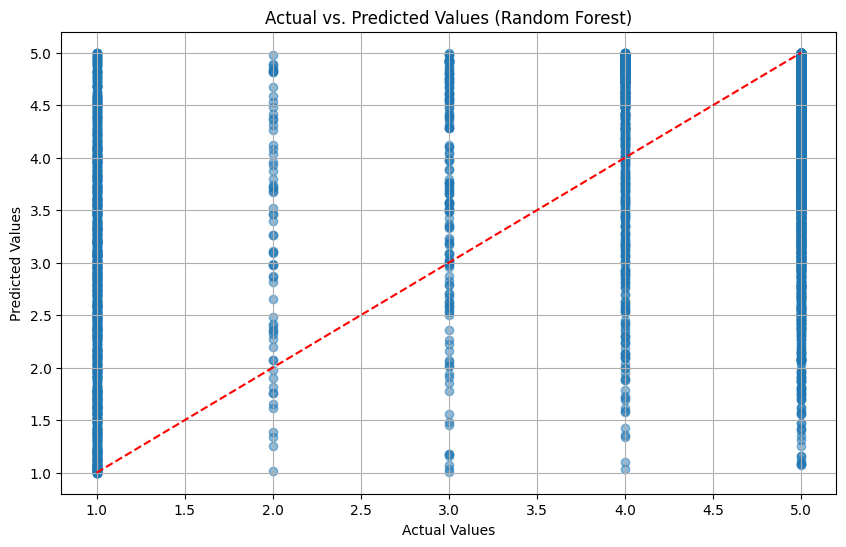

In [5]:
# Preprocess categorical features using OneHotEncoder
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(data[['Agent Shift', 'Tenure Bucket', 'channel_name', 'category', 'Sub-category', 'Supervisor', 'Manager']])
encoded_feature_names = encoder.get_feature_names_out(['Agent Shift', 'Tenure Bucket', 'channel_name', 'category', 'Sub-category', 'Supervisor', 'Manager'])

# Combine numerical and encoded categorical features
X_combined = pd.concat([data[['issue_reported_hour_of_day', 'response_time_minutes', 'issue_reported_day_of_week', 'sentiment_score']], pd.DataFrame(encoded_features.toarray(), columns=encoded_feature_names)], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor on the combined features
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print results for the Random Forest model using multiple features
print("Random Forest Model using multiple features:")
print(f'RMSE: {rmse_rf:.4f}')
print(f'MAE: {mae_rf:.4f}')
print(f'R-squared: {r2_rf:.4f}')

# Print top 5 important features for the model
feature_importances = model_rf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
top_features = [X_combined.columns[i] for i in sorted_indices[:5]]
top_importances = feature_importances[sorted_indices[:5]]

print("\nTop 5 Important Features for the Model:")
for feature, importance in zip(top_features, top_importances):
    print(f"{feature}: {importance:.4f}")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Actual vs. Predicted Values (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

MLP Model using multiple features:
RMSE: 1.2490
MAE: 0.8557
R-squared: 0.3404


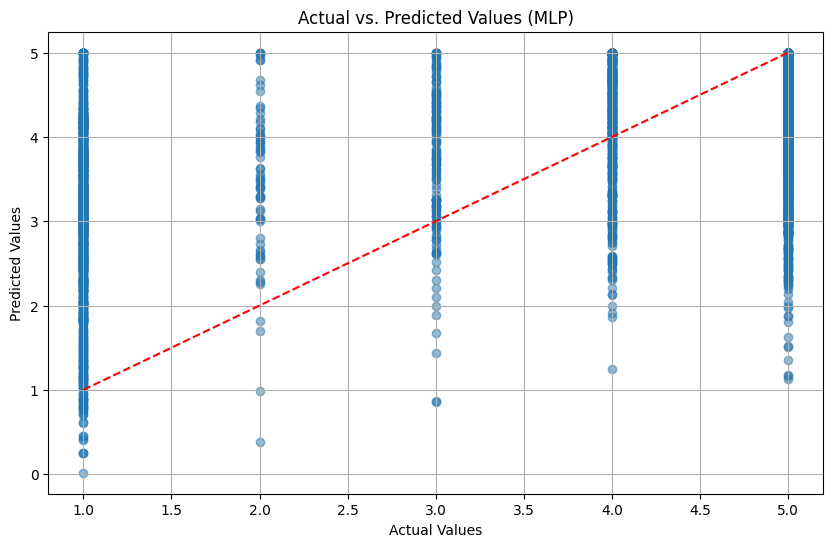

In [9]:
# Preprocess categorical features using OneHotEncoder
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(data[['Agent Shift', 'Tenure Bucket', 'channel_name', 'category', 'Sub-category', 'Supervisor', 'Manager']])
encoded_feature_names = encoder.get_feature_names_out(['Agent Shift', 'Tenure Bucket', 'channel_name', 'category', 'Sub-category', 'Supervisor', 'Manager'])

# Combine numerical and encoded categorical features
X_combined = pd.concat([data[['issue_reported_hour_of_day', 'response_time_minutes', 'issue_reported_day_of_week', 'sentiment_score']], pd.DataFrame(encoded_features.toarray(), columns=encoded_feature_names)], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Train a Multi-Layer Perceptron Regressor on the combined features
model_mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)
model_mlp.fit(X_train, y_train)
y_pred_mlp = model_mlp.predict(X_test)
y_pred_mlp = np.clip(y_pred_mlp, 0, 5)

rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

# Print results for the MLP model using multiple features
print("MLP Model using multiple features:")
print(f'RMSE: {rmse_mlp:.4f}')
print(f'MAE: {mae_mlp:.4f}')
print(f'R-squared: {r2_mlp:.4f}')

# Print top 5 important features for the model
# MLP does not provide direct feature importances like Random Forest, so we'll skip this part

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_mlp, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Actual vs. Predicted Values (MLP)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()